## Convert the Gps images into a usable format

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

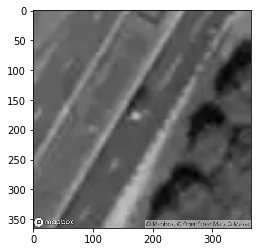

In [5]:
plt.imshow(img_array,cmap="gray")
plt.show()

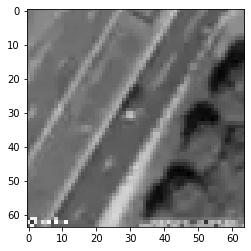

In [11]:
new_img_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_img_array, cmap = 'gray')
plt.show()

## Create the training data

In [19]:
DATADIR = "images"
CATEGORIES=["safe","danger"]

training_data = []

IMG_SIZE = 64

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_arary = cv2.resize(img_array , (IMG_SIZE, IMG_SIZE))
            training_data.append([new_arary, class_num])
           
        
create_training_data()
    


In [20]:
print(len(training_data))

11090


In [22]:
import random

random.shuffle(training_data)

In [31]:
X = []
y = []

In [32]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE,1)

## Save the training data for posterior use

In [38]:
import pickle

pickle_out = open("X.pickle" ,"wb")
pickle.dump(X, pickle_out)
pickle_out.close()


pickle_out = open("y.pickle" ,"wb")
pickle.dump(y, pickle_out)
pickle_out.close()



## Create the model

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten ,Conv2D, MaxPooling2D
import pickle

X = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))

X = X/255.0


In [52]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

model.fit(X, y, batch_size=32,epochs = 3,validation_split=0.3)

Train on 7762 samples, validate on 3328 samples
Epoch 1/3
7762/7762 [==============================] - 26s 3ms/sample - loss: 0.6470 - acc: 0.6388 - val_loss: 0.5743 - val_acc: 0.7308
Epoch 2/3
7762/7762 [==============================] - 26s 3ms/sample - loss: 0.5739 - acc: 0.7092 - val_loss: 0.5778 - val_acc: 0.7356
Epoch 3/3
7762/7762 [==============================] - 25s 3ms/sample - loss: 0.5537 - acc: 0.7166 - val_loss: 0.5484 - val_acc: 0.7359
